In [4]:
from PIL import Image, ImageFilter, ImageStat
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2, glob
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy
import PIL
import os
import itertools
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve, KFold, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import sklearn
from sklearn.metrics import confusion_matrix
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D
import keras
from keras.models import Sequential, model_from_json
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical  # convert to one-hot-encoding
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, MaxPooling2D, Activation
from keras.optimizers import RMSprop, SGD, Adam
from keras import callbacks
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, Callback, EarlyStopping

# Sử dụng tensorflow.keras thay vì keras trong các phiên bản mới của TensorFlow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

# Fix the invalid escape sequence by using raw string or double backslashes
os.chdir(r'D:\project\Visual_Questions_Answers_Simpsons_Family\archive\kaggle_simpson_testset\kaggle_simpson_testset')

# Rest of your code here...


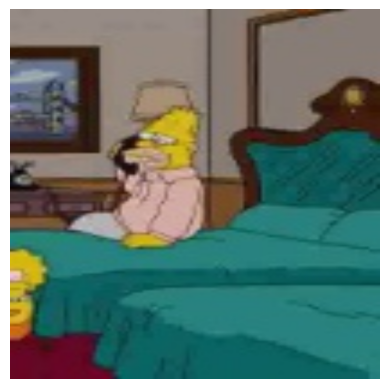

In [8]:
import cv2
import matplotlib.pyplot as plt

# Sửa đường dẫn hình ảnh bằng raw string
image_name = r"D:\project\Visual_Questions_Answers_Simpsons_Family\archive\kaggle_simpson_testset\kaggle_simpson_testset\abraham_grampa_simpson_13.jpg" 

def plotLisa(image_location):
    # Đọc ảnh
    image = cv2.imread(image_location)
    
    # Kiểm tra xem ảnh có được đọc thành công hay không
    if image is None:
        print("Lỗi: Không thể đọc tệp hình ảnh.")
        return
    
    # Resize ảnh
    image = cv2.resize(image, (512, 512))
    
    # Hiển thị ảnh
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Tắt trục
    plt.show()

# Gọi hàm để vẽ ảnh
plotLisa(image_name)


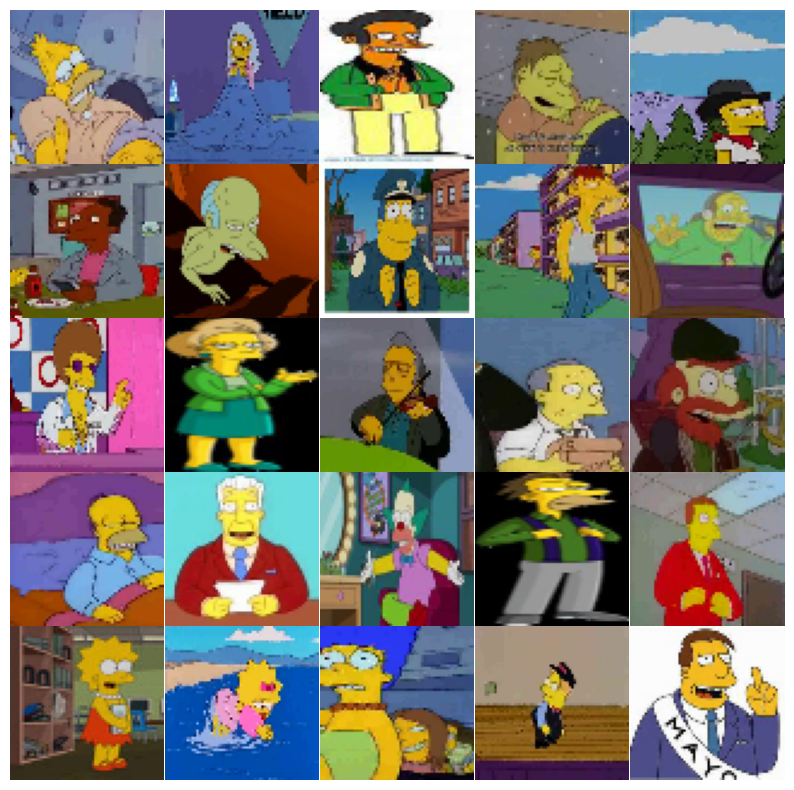

In [13]:
import cv2
import matplotlib.pyplot as plt
import glob
import os

# Lấy danh sách tất cả các thư mục con trong simpsons_dataset
simpsons_folders = glob.glob(r'D:\project\Visual_Questions_Answers_Simpsons_Family\archive\simpsons_dataset\*')

# Khởi tạo biến đếm
i_ = 0

# Thiết lập kích thước hình ảnh
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)

# Vẽ ảnh từ các thư mục con (mỗi thư mục chứa ảnh của một nhân vật)
for folder in simpsons_folders[:25]:  # Lấy 25 thư mục đầu tiên
    # Lấy tất cả các hình ảnh trong thư mục
    images = glob.glob(os.path.join(folder, '*'))  
    
    for img_path in images[:1]:  # Lấy ảnh đầu tiên từ mỗi thư mục
        im = cv2.imread(img_path)  # Đọc ảnh
        if im is None:
            print(f"Lỗi: Không thể đọc ảnh {img_path}")
            continue  # Bỏ qua ảnh nếu không thể đọc
        
        im = cv2.resize(im, (64, 64))  # Resize ảnh về kích thước 64x64
        plt.subplot(5, 5, i_ + 1)
        plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))  # Chuyển từ BGR sang RGB
        plt.axis('off')  # Tắt trục
        i_ += 1

# Hiển thị các ảnh
plt.show()


In [16]:
!pip install imageio



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from PIL import Image
import glob

# Dictionary for character labels
dict_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lenny_leonard', 11:'lisa_simpson',
        12: 'marge_simpson', 13: 'mayor_quimby',14:'milhouse_van_houten', 15: 'moe_szyslak', 
        16: 'ned_flanders', 17: 'nelson_muntz', 18: 'principal_skinner', 19: 'sideshow_bob'}

# Load and preprocess test set using PIL
def load_test_set(dirname, dict_characters):
    X_test = []
    Y_test = []
    
    # Print the directory and check its contents
    print(f"Checking directory: {dirname}")
    
    # Use glob to get all images in subfolders
    image_paths = glob.glob(os.path.join(dirname, '*', '*.jpg'))  # Only look for .jpg files
    if not image_paths:
        print(f"No .jpg images found in {dirname}. Checking for other image formats.")
        image_paths = glob.glob(os.path.join(dirname, '*', '*.png'))  # Try for .png files
    
    # If still no images, print a message
    if not image_paths:
        print(f"Error: No images found in the directory. Please check the paths.")
        return np.array(X_test), np.array(Y_test)
    
    for image_path in image_paths:
        # Extract character name from folder name (ensure full character name)
        character_name = "_".join(image_path.split(os.sep)[-2].split('_')[:-1])  # Extract character name
        character_name_full = character_name + "_simpson"  # Ensure the full name is correct
        
        # Check if character_name exists in the dictionary
        if character_name_full not in dict_characters.values():
            print(f"Warning: Character {character_name_full} not found in dictionary. Skipping.")
            continue  # Skip if the character name is not found in the dictionary
        
        # Get label for the character
        label = [label for label, character in dict_characters.items() if character == character_name_full][0]
        
        # Read image using PIL
        image = Image.open(image_path)
        
        # Resize image to 64x64
        image_resized = image.resize((64, 64))
        
        # Convert image to numpy array
        X_test.append(np.array(image_resized))
        Y_test.append(label)
    
    return np.array(X_test), np.array(Y_test)

# Load the dataset
X_test, Y_test = load_test_set(r"D:\project\Visual_Questions_Answers_Simpsons_Family\archive\simpsons_dataset", dict_characters)

# Check if any data has been loaded
if len(X_test) == 0:
    print("Error: No images were loaded. Please check the file paths and directory structure.")
else:
    print(f"Loaded {len(X_test)} images.")

    # Split data into train and test sets (80% train, 20% test)
    X_train, X_test, Y_train, Y_test = train_test_split(X_test, Y_test, test_size=0.2)

    # Reduce sample size for debugging (first 1000 samples)
    X_train = X_train[:1000]
    Y_train = Y_train[:1000]
    X_test = X_test[:1000]
    Y_test = Y_test[:1000]

    # Normalize data to the range [0, 1]
    X_train = X_train / 255.0
    X_test = X_test / 255.0

    print("Training Data Shape:", X_train.shape)
    print("Testing Data Shape:", X_test.shape)

    # Flatten the data to 1D for compatibility with standard classifiers
    X_trainShape = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]
    X_testShape = X_test.shape[1] * X_test.shape[2] * X_test.shape[3]

    X_trainFlat = X_train.reshape(X_train.shape[0], X_trainShape)
    X_testFlat = X_test.reshape(X_test.shape[0], X_testShape)

    # Encode labels as one-hot vectors
    Y_trainHot = to_categorical(Y_train, num_classes=20)
    Y_testHot = to_categorical(Y_test, num_classes=20)


Checking directory: D:\project\Visual_Questions_Answers_Simpsons_Family\archive\simpsons_dataset
Loaded 7146 images.
Training Data Shape: (1000, 64, 64, 3)
Testing Data Shape: (1000, 64, 64, 3)
